In [31]:
pip install psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [32]:
import numpy as np 
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
import matplotlib.pyplot as plt

In [33]:
conn = ps.connect(dbname="northwind",
                 user= "postgres",
                 password= "12345",
                 port = 5432)

# Product Performance Analysis

### Top 10 Selling Products

In [34]:
sql = '''SELECT 
    p.product_id, 
    CONCAT(p.product_name, ' (', c.category_name, ')') AS product_with_category, 
    SUM(od.quantity) AS total_sales
FROM 
    products p
JOIN 
    order_details AS od ON p.product_id = od.product_id
JOIN 
    categories AS c ON p.category_id = c.category_id
GROUP BY 
    p.product_id, 
    product_with_category
ORDER BY 
    total_sales DESC
LIMIT 10;
'''              

In [35]:
df = sqlio.read_sql_query(sql,conn)
df.head(10)

C:\Users\Burcu\AppData\Local\Temp\ipykernel_4776\1581964848.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql,conn)


,product_id,product_with_category,total_sales
0,60,Camembert Pierrot (Dairy Products),1577
1,59,Raclette Courdavault (Dairy Products),1496
2,31,Gorgonzola Telino (Dairy Products),1397
3,56,Gnocchi di nonna Alice (Grains/Cereals),1263
4,16,Pavlova (Confections),1158
5,75,Rhönbräu Klosterbier (Beverages),1155
6,24,Guaraná Fantástica (Beverages),1125
7,40,Boston Crab Meat (Seafood),1103
8,62,Tarte au sucre (Confections),1083
9,71,Flotemysost (Dairy Products),1057


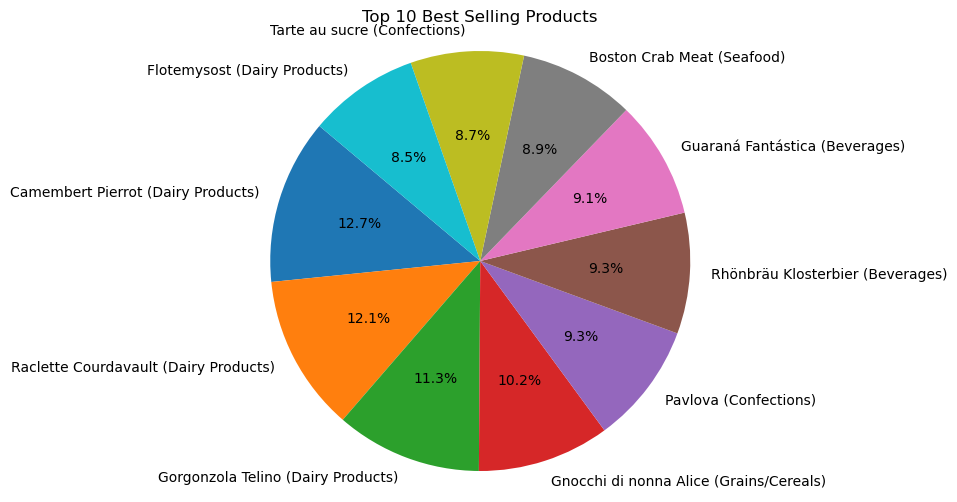

In [36]:
labels = df['product_with_category']
sizes = df['total_sales']


plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Best Selling Products')
plt.axis('equal')  
plt.show()

### Total Order Quantity by Category

In [37]:
sql1= '''SELECT 
    c.category_name,
    SUM(od.quantity) AS total_quantity
FROM 
    order_details od
JOIN 
    products p ON od.product_id = p.product_id
JOIN 
    categories c ON p.category_id = c.category_id
GROUP BY 
    c.category_name
ORDER BY 
    total_quantity DESC;'''

In [38]:
df = sqlio.read_sql_query(sql1,conn)
df.head(8)

C:\Users\Burcu\AppData\Local\Temp\ipykernel_4776\2394045770.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql1,conn)


,category_name,total_quantity
0,Beverages,9532
1,Dairy Products,9149
2,Confections,7906
3,Seafood,7681
4,Condiments,5298
5,Grains/Cereals,4562
6,Meat/Poultry,4199
7,Produce,2990


### Kategorilere Göre Toplam Kazanç

In [39]:
sql2 = '''
SELECT 
    c.category_name,
    CAST(SUM(od.quantity * (od.unit_price * (1 - od.discount))) AS NUMERIC(10, 2)) AS total_revenue
FROM 
    order_details od
JOIN 
    products p ON od.product_id = p.product_id
JOIN 
    categories c ON p.category_id = c.category_id
GROUP BY 
    c.category_name
ORDER BY 
    total_revenue DESC;
'''

In [40]:
df = sqlio.read_sql_query(sql2,conn)
df.head(8)

C:\Users\Burcu\AppData\Local\Temp\ipykernel_4776\3493776363.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql2,conn)


,category_name,total_revenue
0,Beverages,267868.18
1,Dairy Products,234507.28
2,Confections,167357.23
3,Meat/Poultry,163022.36
4,Seafood,131261.74
5,Condiments,106047.08
6,Produce,99984.58
7,Grains/Cereals,95744.59


### Quarterly Change in Total Sales and Total Revenue by Categories

In [41]:
sql3 = '''WITH sales_data AS (
    SELECT
        c.category_name,
        DATE_TRUNC('quarter', o.order_date) AS order_quarter,
        SUM(od.quantity) AS total_quantity,
        SUM(od.quantity * (od.unit_price * (1 - od.discount))) AS total_revenue
    FROM
        order_details od
    JOIN
        products p ON od.product_id = p.product_id
    JOIN
        categories c ON p.category_id = c.category_id
    JOIN
        orders o ON od.order_id = o.order_id
    GROUP BY
        c.category_name,
        DATE_TRUNC('quarter', o.order_date)
)

SELECT
    category_name,
    order_quarter,
    SUM(total_quantity) AS total_quantity,
    SUM(total_revenue) AS total_revenue
FROM
    sales_data
GROUP BY
    category_name,
    order_quarter
ORDER BY
    category_name,
    order_quarter;
'''

In [42]:
df = sqlio.read_sql_query(sql3,conn)
df.head()

C:\Users\Burcu\AppData\Local\Temp\ipykernel_4776\482347471.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = sqlio.read_sql_query(sql3,conn)


,category_name,order_quarter,total_quantity,total_revenue
0,Beverages,1996-07-01 00:00:00+03:00,904.0,13137.779726
1,Beverages,1996-10-01 00:00:00+03:00,938.0,34781.220084
2,Beverages,1997-01-01 00:00:00+02:00,1021.0,35386.880118
3,Beverages,1997-04-01 00:00:00+03:00,903.0,25982.024986
4,Beverages,1997-07-01 00:00:00+03:00,835.0,19452.849986


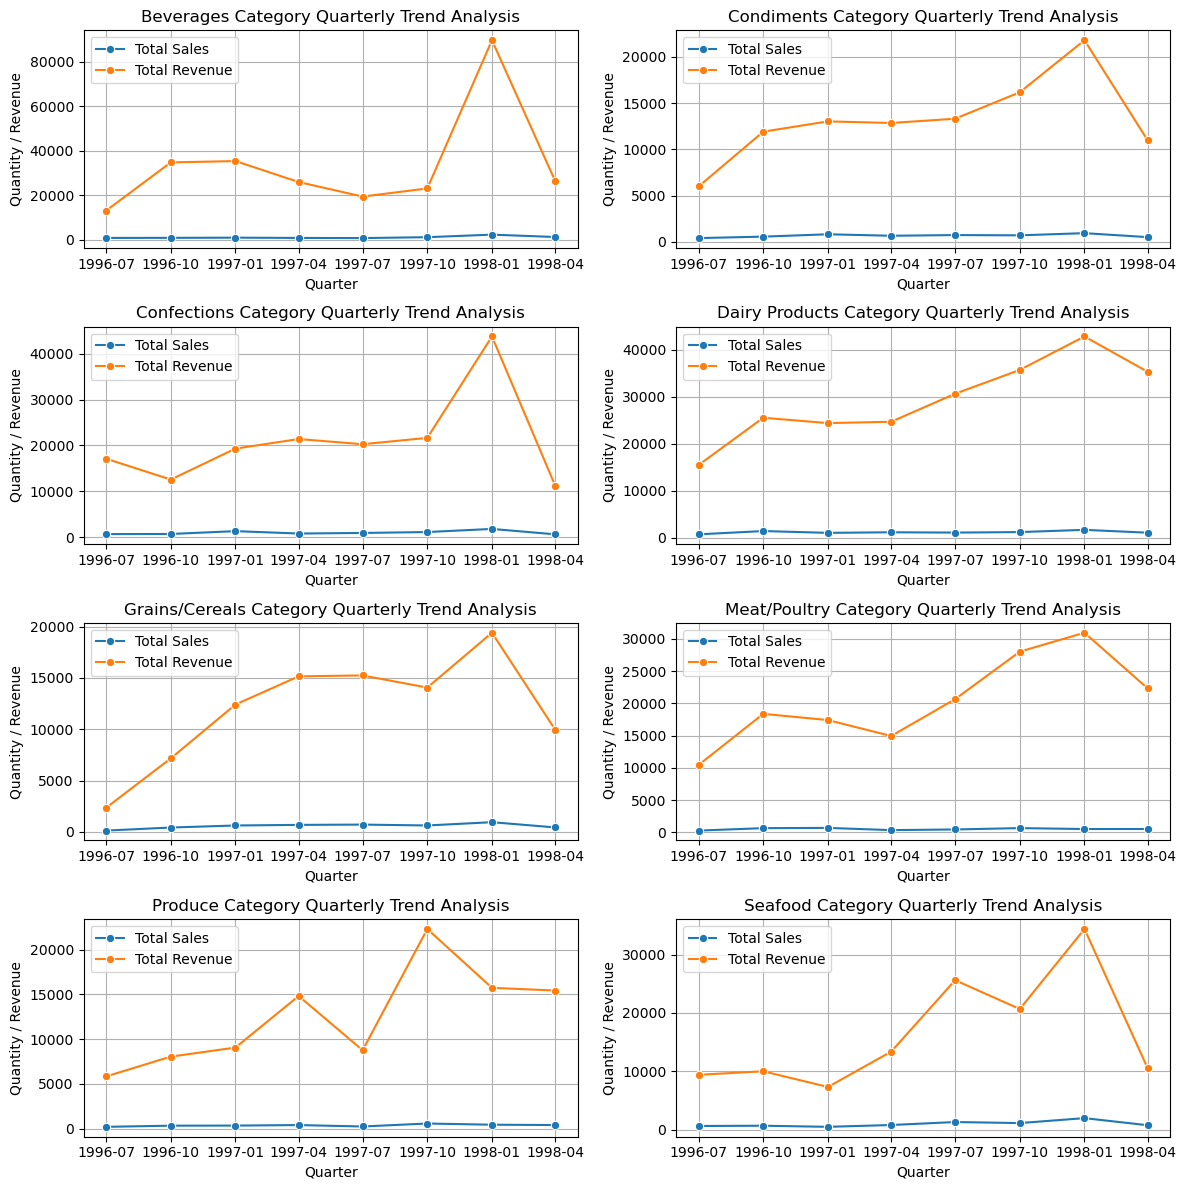

In [51]:
import seaborn as sns

categories = df['category_name'].unique()

num_rows = 4
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))
fig.subplots_adjust(hspace=0.5)

for i, category in enumerate(categories):
    row = i // num_cols
    col = i % num_cols
    
    category_data = df[df['category_name'] == category]
    
    sns.lineplot(data=category_data, x='order_quarter', y='total_quantity', marker='o', label='Total Sales', ax=axes[row, col])
    sns.lineplot(data=category_data, x='order_quarter', y='total_revenue', marker='o', label='Total Revenue', ax=axes[row, col])
    axes[row, col].set_title(f'{category} Category Quarterly Trend Analysis')
    axes[row, col].set_xlabel('Quarter')
    axes[row, col].set_ylabel('Quantity / Revenue')
    axes[row, col].legend()
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()